In [46]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [28]:
data = pd.read_csv('../data/raw/Data.csv', sep=';')
data.head()

,Id,Bereich,Sachnummer,Bezeichnung,Bezugsquelle,Preis,Breite Laserzuschnitt in mm,Breite Laserzuschnitt in mm.1,Bauteilgewicht in kg,Materialsärke in mm,Material,Anzahl der Abkantungen,Laseraussparungen vorhanden? Wenn ja: Gesamtlänge aller Aussparungen in mm
0,1,A,1376209,Anschlag,Eigenfertigungsteil,"3,58","194,3",80,"0,74",6,S355MC,4,"109,9"
1,2,A,1328576,Rippe,Eigenfertigungsteil,"1,17","129,1","72,3","0,269",8,S355MC,0,"3,14"
2,3,A,26405944,Mantel,Kaufteil,14,"177,1",784,"5,2",5,Hardox 400,1,0
3,4,A,2601581,Verschleissblech,Kaufteil,"11,08",80,770,"2,391",5,Hardox 400,0,250
4,5,A,1412785,Verstärkung,Eigenfertigungsteil,"3,32","243,2","191,5","1,059",5,S355MC,2,100


In [29]:
data.rename(columns={'Breite Laserzuschnitt in mm':'Breite Laserzuschnitt in mm 1'}, inplace=True)
data.rename(columns={'Breite Laserzuschnitt in mm.1':'Breite Laserzuschnitt in mm 2'}, inplace=True)
data.rename(columns={'Laseraussparungen vorhanden? Wenn ja: Gesamtlänge aller Aussparungen in mm':'Gesamtlänge aller Aussparungen in mm'}, inplace=True)

In [30]:
cols_with_commas = ['Preis', 'Breite Laserzuschnitt in mm 1', 'Breite Laserzuschnitt in mm 2', 'Bauteilgewicht in kg', 'Materialsärke in mm', 'Gesamtlänge aller Aussparungen in mm']

for col in cols_with_commas: 
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

data['Anzahl der Abkantungen'] = data['Anzahl der Abkantungen'].astype(int)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    149 non-null    int64  
 1   Bereich                               149 non-null    object 
 2   Sachnummer                            149 non-null    int64  
 3   Bezeichnung                           149 non-null    object 
 4   Bezugsquelle                          149 non-null    object 
 5   Preis                                 149 non-null    float64
 6   Breite Laserzuschnitt in mm 1         149 non-null    float64
 7   Breite Laserzuschnitt in mm 2         149 non-null    float64
 8   Bauteilgewicht in kg                  149 non-null    float64
 9   Materialsärke in mm                   149 non-null    float64
 10  Material                              149 non-null    object 
 11  Anzahl der Abkantun

Text(0, 0.5, 'Anzahl')

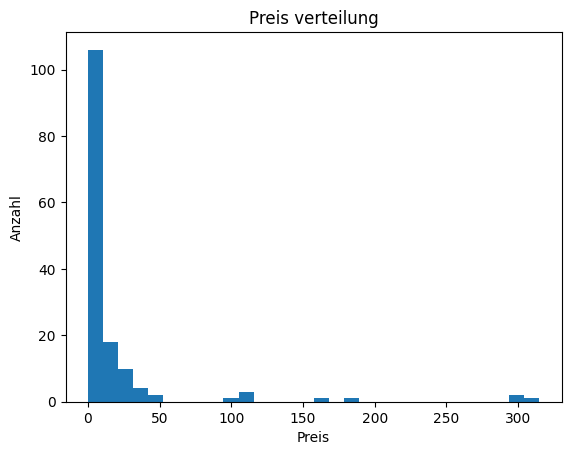

In [32]:
plt.hist(data['Preis'], bins=30)
plt.title('Preis verteilung')
plt.xlabel('Preis')
plt.ylabel('Anzahl')

Text(0, 0.5, 'Preis')

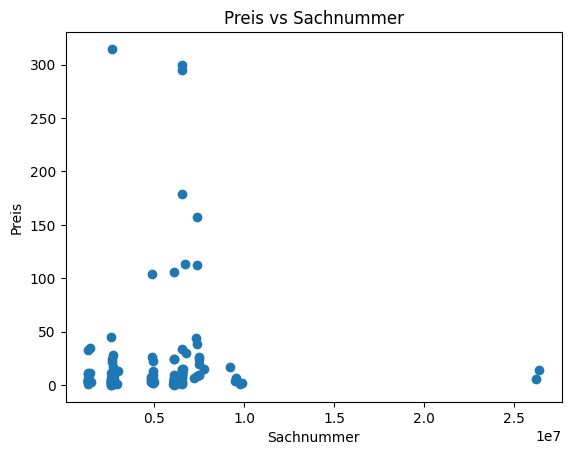

In [33]:
plt.scatter(data['Sachnummer'], data['Preis'])
plt.title('Preis vs Sachnummer')
plt.xlabel('Sachnummer')
plt.ylabel('Preis')

In [34]:
data.drop('Sachnummer', axis=1, inplace=True)

Text(0, 0.5, 'Preis')

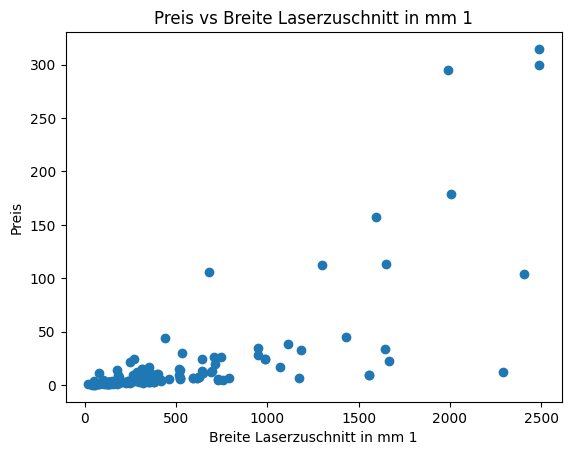

In [35]:
plt.scatter(data['Breite Laserzuschnitt in mm 1'], data['Preis'])
plt.title('Preis vs Breite Laserzuschnitt in mm 1')
plt.xlabel('Breite Laserzuschnitt in mm 1')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

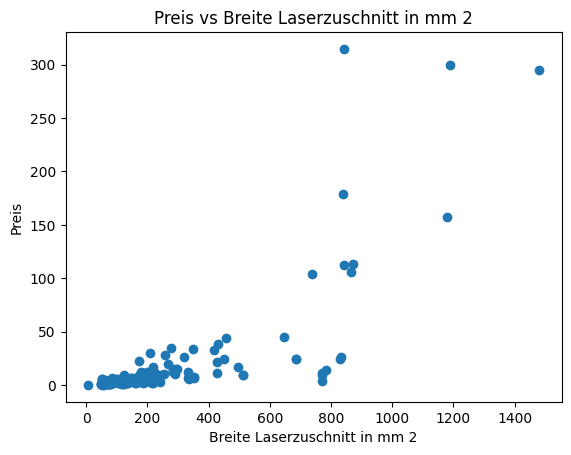

In [36]:
plt.scatter(data['Breite Laserzuschnitt in mm 2'], data['Preis'])
plt.title('Preis vs Breite Laserzuschnitt in mm 2')
plt.xlabel('Breite Laserzuschnitt in mm 2')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

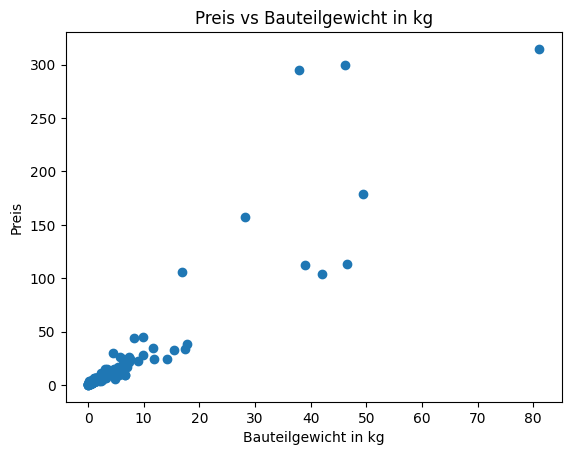

In [37]:
plt.scatter(data['Bauteilgewicht in kg'], data['Preis'])
plt.title('Preis vs Bauteilgewicht in kg')
plt.xlabel('Bauteilgewicht in kg')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

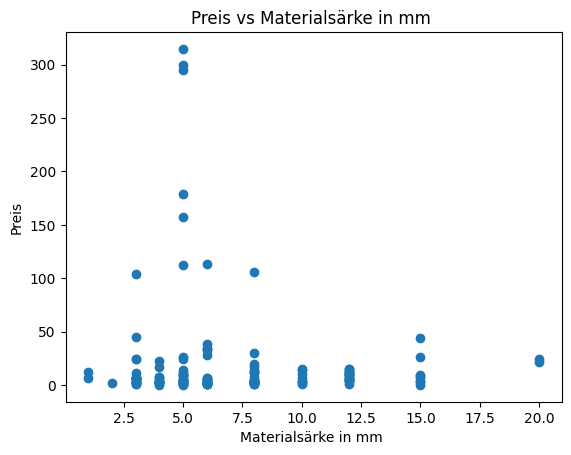

In [38]:
plt.scatter(data['Materialsärke in mm'], data['Preis'])
plt.title('Preis vs Materialsärke in mm ')
plt.xlabel('Materialsärke in mm ')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

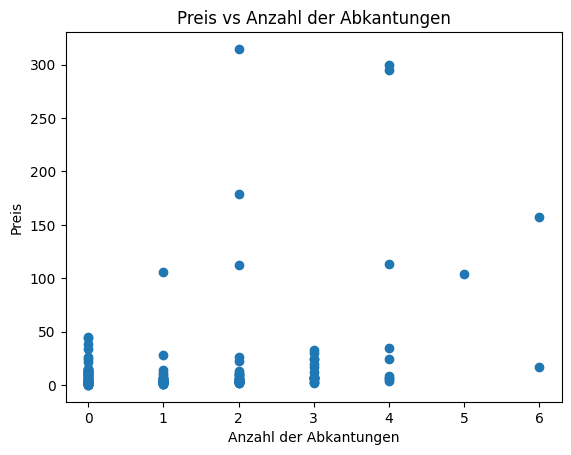

In [39]:
plt.scatter(data['Anzahl der Abkantungen'], data['Preis'])
plt.title('Preis vs Anzahl der Abkantungen')
plt.xlabel('Anzahl der Abkantungen')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

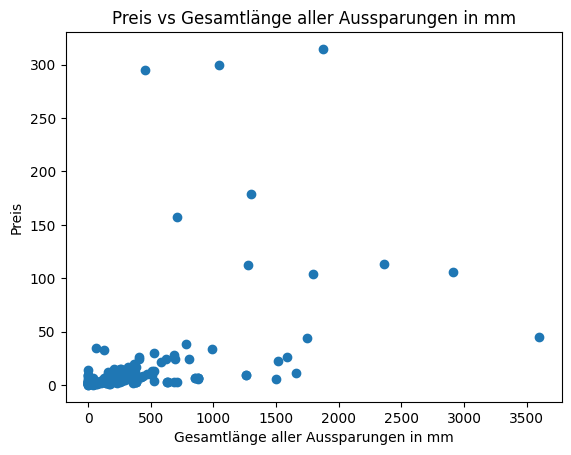

In [40]:
plt.scatter(data['Gesamtlänge aller Aussparungen in mm'], data['Preis'])
plt.title('Preis vs Gesamtlänge aller Aussparungen in mm')
plt.xlabel('Gesamtlänge aller Aussparungen in mm')
plt.ylabel('Preis')

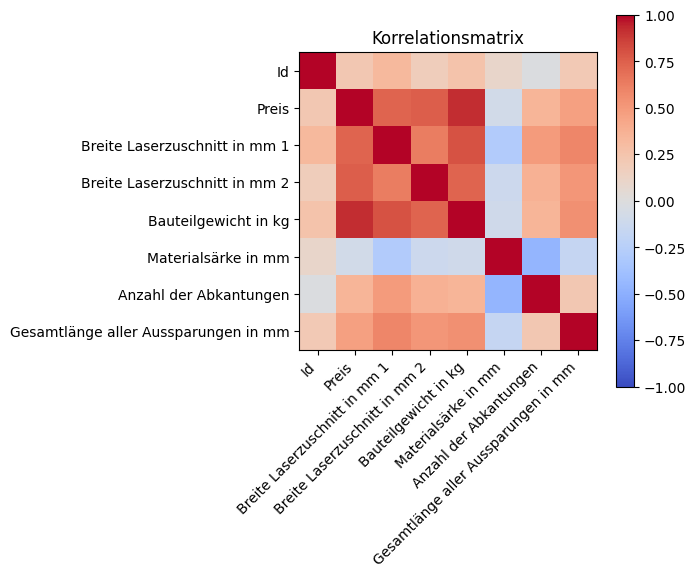

In [41]:
coeff_matrix = data.select_dtypes(include=['int64','float64']).corr()
plt.matshow(coeff_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(coeff_matrix.columns)), coeff_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(coeff_matrix.columns)), coeff_matrix.columns)
plt.title("Korrelationsmatrix")
plt.gca().xaxis.set_ticks_position('bottom')
plt.colorbar()
plt.show()

Text(0, 0.5, 'Preis')

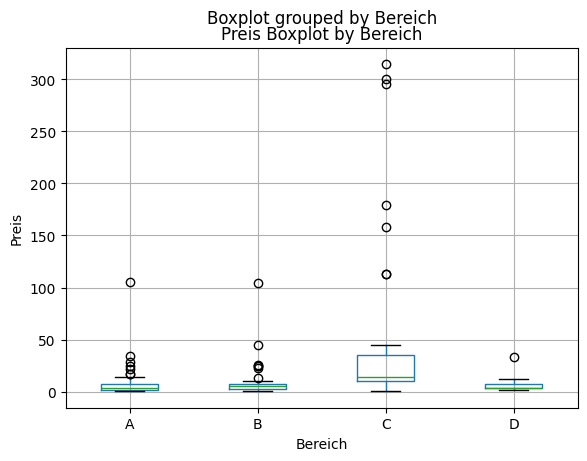

In [42]:
data.boxplot(column='Preis', by='Bereich')
plt.title('Preis Boxplot by Bereich')
plt.xlabel('Bereich')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

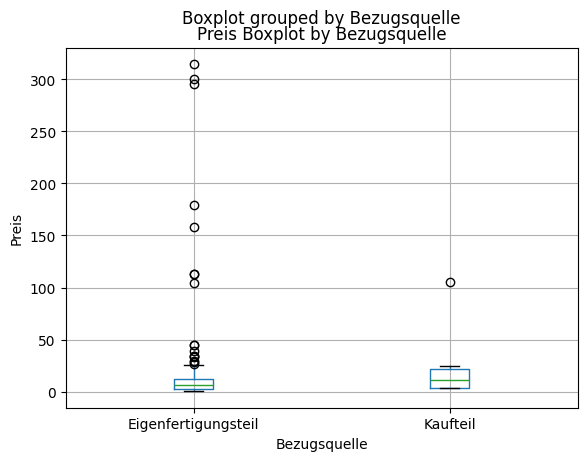

In [43]:
data.boxplot(column='Preis', by='Bezugsquelle')
plt.title('Preis Boxplot by Bezugsquelle')
plt.xlabel('Bezugsquelle')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

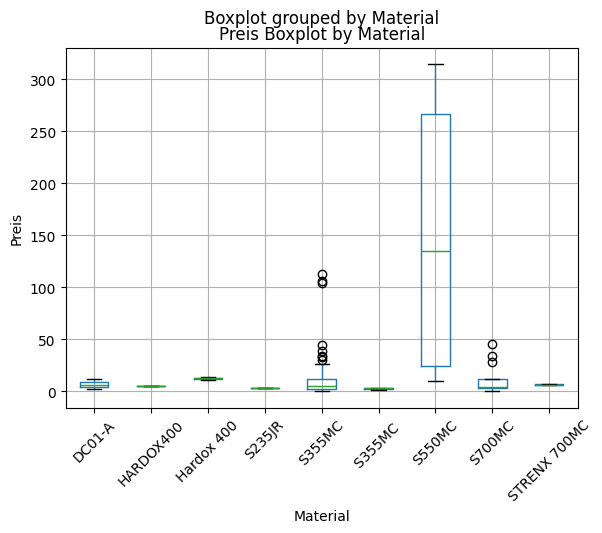

In [44]:
data.boxplot(column='Preis', by='Material')
plt.xticks(rotation=45)
plt.title('Preis Boxplot by Material')
plt.xlabel('Material')
plt.ylabel('Preis')

In [45]:
data.to_csv('../data/processed/cleaned_data.csv', sep=',', index=False)